In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

First, let us build a function to create random periodic signals.

In [31]:
def gen_periodic_data(x, period=1, amplitude=1, phase=0, noise=0):
    '''Generate periodic data given the function inputs
    
    y = A*cos(x/p - phase) + noise
    
    Parameters
    ----------
    x : array-like
        input values to evaluate the array
    
    period : float (default=1)
        period of the periodic signal
    
    amplitude : float (default=1)
        amplitude of the periodic signal
    
    phase : float (default=0)
        phase offset of the periodic signal
    
    noise : float (default=0)
        variance of the noise term added to the periodic signal
    
    Returns
    -------
    y : array-like
        Periodic signal evaluated at all points x
    '''
    
    y = amplitude*np.sin(2*np.pi*x/(period) - phase) + np.random.normal(0, np.sqrt(noise), size=len(x))
    return y

Generate a signal with $A = 2$ and $p = \pi$ over a regular grid between 0 and 10. Plot your results to confirm your code from the previous problem. 

<IPython.core.display.Javascript object>


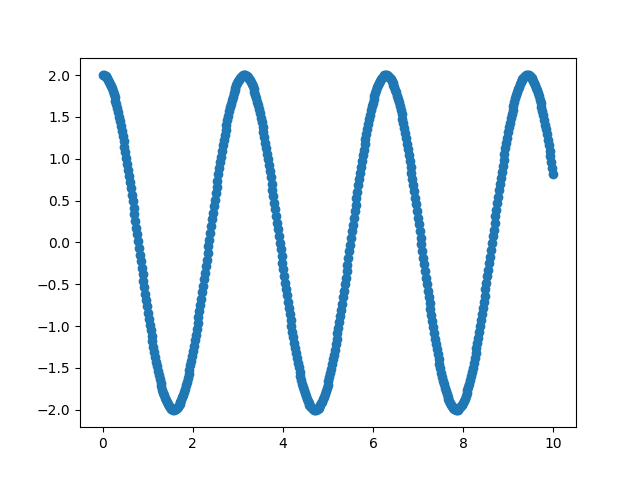

In [19]:
x = np.linspace(0,10,500)
y = gen_periodic_data(x, period=np.pi,amplitude=2)

plt.scatter(x,y)

Now, generate a function to plot phase folded data which takes x, y, period, and y uncertainties as input.

In [26]:
def phase_plot(x, y, period, y_unc = None):
    
    phases = (x/period) % 1
    if y_unc == None:
        y_unc = np.zeros_like(x)
    
    plot_order = np.argsort(phases)
    plt.errorbar(phases[plot_order], y[plot_order], y_unc[plot_order])
    plt.xlabel("phase")
    plt.ylabel("signal")

Plot the phase folded light curve for the previously generated data.

<IPython.core.display.Javascript object>


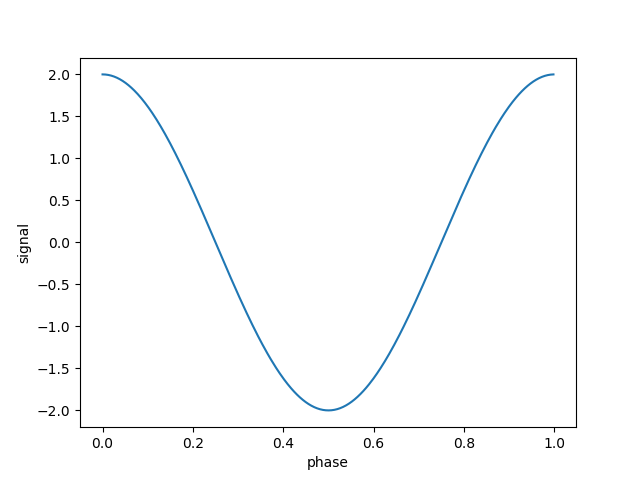

In [27]:
phase_plot(x, y, np.pi)

Now that we have those two basic steps out of the way, we are going to transition into the detection of periodic signals in data.

In astronomy, this is typically done with the Lomb-Scargle (LS) periodogram ([Lomb 19xx](); [Scargle 19xx]()). To understand how to interpret the LS periodogram, we first need to consider Fourier transforms.

*Note - here we aim to jog your memory regarding Fourier analysis. Detailed mathematical calculations can be found elsewhere.*

Given a continuous signal, $g(t)$ the Fourier transform of that signal is defined as:

$$\hat{\mathrm{g}}(f) = \int_{-\infty}^{\infty} g(t) \,e^{-2\pi i f t} \,dt,$$

where $i$ is an imaginary number. The inverse of this equation is defined as:

$$ g(t) = \int_{-\infty}^{\infty} \hat{\mathrm{g}}(f) \,e^{-2\pi i f t} \,dt.$$

For convenience, we will use the Fourier transform operator $\mathcal{F}$, from which the above equations reduce to: 

$$\mathcal{F}(g) = \hat g$$

$$\mathcal{F}^{-1}(\hat{g}) = g$$

There are many useful properties of the Fourier transform including that the Fourier transform is a linear operator. Additionally, a time shift imparts a phase shift. Perhaps most importantly for our present purposes, however, is that the squared amplitude of the resulting transform allows us to get rid of the imaginary component and measure the power spectral density or power spectrum:

$$ \mathcal{P}_g = |\mathcal{F}(g)|^2.$$

The power spectrum is a real-valued function that quantifies the contribution of each frequency $f$ to the total signal in $g$. The power spectrum thus provides a way to identify the dominant frequency in any given signal. 

Next we consider some common Fourier pairs, that will prove helpful in our interpretation of the LS periodogram. 

<IPython.core.display.Javascript object>


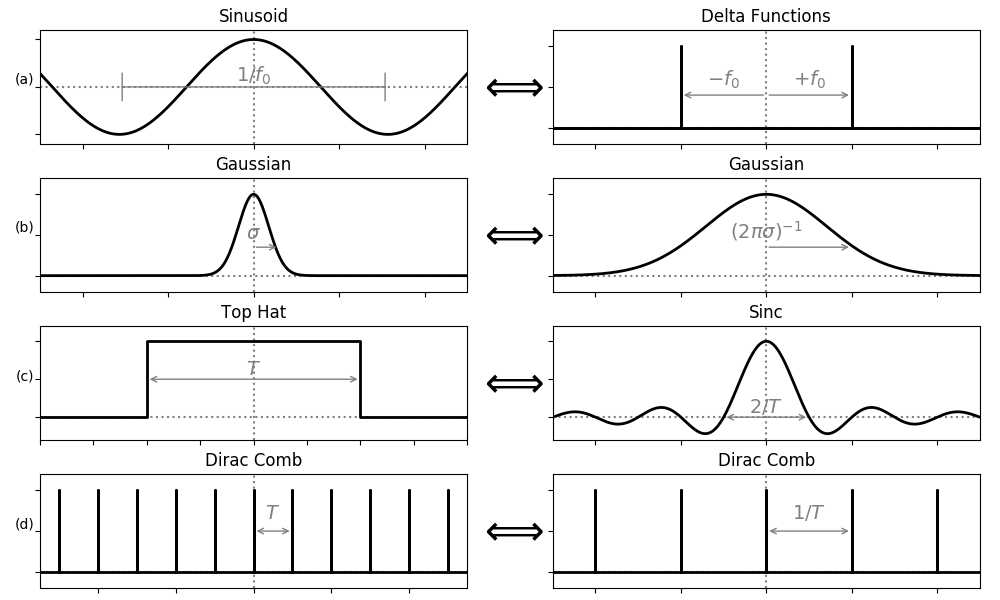

In [29]:
fourier_pairs_plot()

The final property of the Fourier transform to consider today is the convolution theorem. Fourier transforms convert convolutions into point-wise products. We define a convolution as:

$$ [f \ast g] (t) = \int_{-\infty}^{\infty} f(\tau) \,g(t - \tau) \,d\tau,$$

where $\ast$ is the convolution symbol. From the convolution theorem:

$$ \mathcal{F} \{f \ast g\} = \mathcal{F}(f)  \mathcal{F}(g) $$

Furthermore, the Fourier transform of a product is equal to the convolution of the Fourier transforms:

$$ \mathcal{F}\{f \cdot g\} = \mathcal{F}(f) \ast \mathcal{F}(g) $$

This property will be very important for understanding the Lomb-Scargle periodogram. 

Fourier transforms are all well and good, but ultimately we desire a measure of periodicity in actual observations of astrophysical sources, which cannot be (a) continuous, or (b) infinite. 

The first thing to understand with real world observations is the Nyquist frequency limit. If observations are obtained in a uniformly spaced manner at a rate of $f_0 = 1/T$ one can only recover the frequncy information if the signal is band-limited between frequencies $\pm f_0/2$. Put another way, the highest frequency that can be detected in such data is $f_0/2$.

This result can be (somewhat) intuited by looking at simulated data. Let us return to our generating functions from before. 

Generate and plot a periodic signal with $f = f_\mathrm{Ny} = 1/2$ on a grid from 0 to 10, comprising of 10 even samples (i.e., 0, 1, 2, 3, ..., 10). Overplot the underlying signal in addition to the observations.

<IPython.core.display.Javascript object>


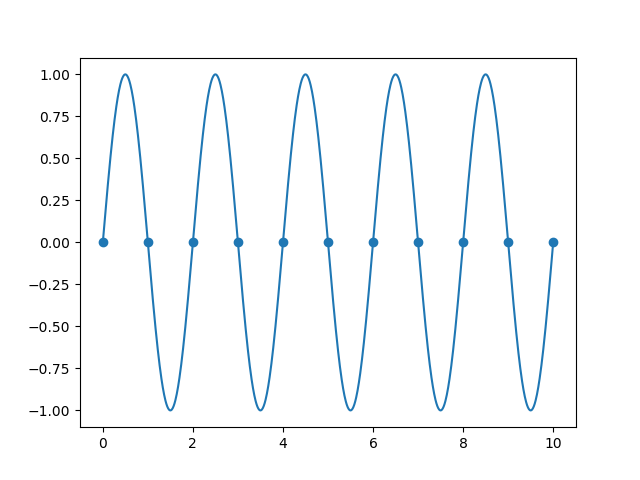

In [41]:
x = np.linspace(0,10,11)
y = gen_periodic_data(x, period=2)
x_signal = np.linspace(0,10,1000)
y_signal = gen_periodic_data(x_signal, period=2)
plt.figure()
plt.scatter(x,y)
plt.plot(x_signal, y_signal)

Sampling a signal directly at the Nyquist frequency results in a lack of any signal detection. 

What about frequencies higher than the Nyquist frequency?

Repeat the exercise above, but for a signal with $f = 0.7$.

<IPython.core.display.Javascript object>


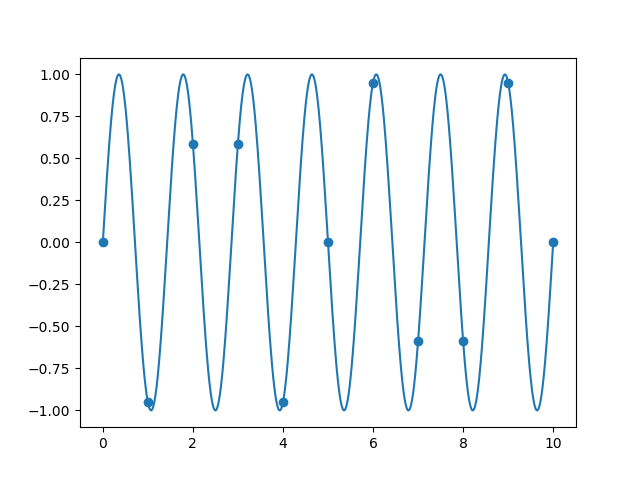

In [43]:
x = np.linspace(0,10,11)
y = gen_periodic_data(x, period=1/0.7)
x_signal = np.linspace(0,10,1000)
y_signal = gen_periodic_data(x_signal, period=1/0.7)
plt.figure()
plt.scatter(x,y)
plt.plot(x_signal, y_signal)

Variability can be seen in this signal. However, there are fewer than 2 observations per cycle. To see why this is problematic, create the same plot as above and overplot a source with $f = 2.7$.

<IPython.core.display.Javascript object>


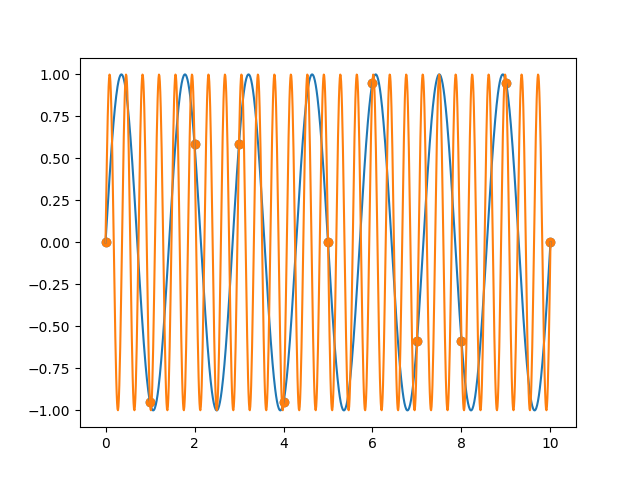

In [47]:
x = np.linspace(0,10,11)
y = gen_periodic_data(x, period=1/0.7)
x_signal = np.linspace(0,10,1000)
y_signal = gen_periodic_data(x_signal, period=1/0.7)
plt.figure()
plt.scatter(x,y)
plt.plot(x_signal, y_signal)

y_high = gen_periodic_data(x, period=1/2.7)
y_signal_high = gen_periodic_data(x_signal, period=1/2.7)
plt.scatter(x,y_high)
plt.plot(x_signal, y_signal_high)

In this case the observations are identical! Practically speaking, what is the importance of the Nyquist frequency:

  1. If you are going to obtain observations at *regular intervals*, and there is a specific signal you wish to detect, then be sure to sample the data such that $f_\mathrm{Ny} > f_\mathrm{signal}$.
  2. For all $f > f_\mathrm{Ny}$, $f$ will be aliased with all signals with $f \pm 2n f_\mathrm{Ny}$, where $n$ is an integer. Practically speaking, this means it does not make sense to search for signals with $f > f_\mathrm{Ny}$.
  3. Finally, (and this is something that is often wrong in the literature) there is no Nyquist limit for unevenly sampled data (see Van der Plas 2013 for further details). Thus, for ground based telescopes one need not worry about the Nyquist limit.

Staying on the topic of non-continuous observations, I present without derivation the discrete Fourier transform:

$$ 

## Code from [PracticalLombScargle](https://github.com/jakevdp/PracticalLombScargle/) by Jake Van der Plas

The functions below implement plotting routines developed by Jake to illustrate some properties of Fourier transforms. 

This code is distributed under a BSD-3 licence, which is repeated below: 

Copyright (c) 2015, Jake Vanderplas
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of PracticalLombScargle nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [28]:
def fourier_pairs_plot():
    
    fig, ax = plt.subplots(4, 2, figsize=(10, 6))
    fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.95,
                        hspace=0.3, wspace=0.2)

    x = np.linspace(-5, 5, 1000)

    for axi in ax.flat:
        axi.xaxis.set_major_formatter(plt.NullFormatter())
        axi.yaxis.set_major_formatter(plt.NullFormatter())

        # draw center line
        axi.axvline(0, linestyle='dotted', color='gray')
        axi.axhline(0, linestyle='dotted', color='gray')

    style_re = dict(linestyle='solid', color='k', linewidth=2)
    style_im = dict(linestyle='solid', color='gray', linewidth=2)
    text_style = dict(size=14, color='gray')


    # sine -> delta
    ax[0, 0].plot(x, np.cos(x),**style_re)
    ax[0, 0].set(xlim=(-5, 5), ylim=(-1.2, 1.2))
    ax[0, 0].annotate('', (-np.pi, 0), (np.pi, 0),
                      arrowprops=dict(arrowstyle='|-|', color='gray'))
    ax[0, 0].text(0, 0, '$1/f_0$', ha='center', va='bottom', **text_style)
    ax[0, 0].set_title('Sinusoid')

    ax[0, 1].plot([-5, 2, 2, 2, 5], [0, 0, 1, 0, 0], **style_re)
    ax[0, 1].plot([-5, -2, -2, -2, 5], [0, 0, 1, 0, 0], **style_re)
    ax[0, 1].set(xlim=(-5, 5), ylim=(-0.2, 1.2))
    ax[0, 1].annotate('', (0, 0.4), (2, 0.4), arrowprops=dict(arrowstyle='<-', color='gray'))
    ax[0, 1].annotate('', (0, 0.4), (-2, 0.4), arrowprops=dict(arrowstyle='<-', color='gray'))
    ax[0, 1].text(1, 0.45, '$+f_0$', ha='center', va='bottom', **text_style)
    ax[0, 1].text(-1, 0.45, '$-f_0$', ha='center', va='bottom', **text_style)
    ax[0, 1].set_title('Delta Functions')

    # gaussian -> gaussian
    ax[1, 0].plot(x, np.exp(-(2 * x) ** 2), **style_re)
    ax[1, 0].set(xlim=(-5, 5), ylim=(-0.2, 1.2))
    ax[1, 0].annotate('', (0, 0.35), (0.6, 0.35), arrowprops=dict(arrowstyle='<-', color='gray'))
    ax[1, 0].text(0, 0.4, '$\sigma$', ha='center', va='bottom', **text_style)
    ax[1, 0].set_title('Gaussian')

    ax[1, 1].plot(x, np.exp(-(x / 2) ** 2), **style_re)
    ax[1, 1].set(xlim=(-5, 5), ylim=(-0.2, 1.2))
    ax[1, 1].annotate('', (0, 0.35), (2, 0.35), arrowprops=dict(arrowstyle='<-', color='gray'))
    ax[1, 1].text(0, 0.4, '$(2\pi\sigma)^{-1}$', ha='center', va='bottom', **text_style)
    ax[1, 1].set_title('Gaussian')

    # top hat -> sinc
    ax[2, 0].plot([-2, -1, -1, 1, 1, 2], [0, 0, 1, 1, 0, 0], **style_re)
    ax[2, 0].set(xlim=(-2, 2), ylim=(-0.3, 1.2))
    ax[2, 0].annotate('', (-1, 0.5), (1, 0.5), arrowprops=dict(arrowstyle='<->', color='gray'))
    ax[2, 0].text(0.0, 0.5, '$T$', ha='center', va='bottom', **text_style)
    ax[2, 0].set_title('Top Hat')

    ax[2, 1].plot(x, np.sinc(x), **style_re)
    ax[2, 1].set(xlim=(-5, 5), ylim=(-0.3, 1.2))
    ax[2, 1].annotate('', (-1, 0), (1, 0), arrowprops=dict(arrowstyle='<->', color='gray'))
    ax[2, 1].text(0.0, 0.0, '$2/T$', ha='center', va='bottom', **text_style)
    ax[2, 1].set_title('Sinc')

    # comb -> comb
    ax[3, 0].plot([-5.5] + sum((3 * [i] for i in range(-5, 6)), []) + [5.5],
                  [0] + 11 * [0, 1, 0] + [0], **style_re)
    ax[3, 0].set(xlim=(-5.5, 5.5), ylim=(-0.2, 1.2))
    ax[3, 0].annotate('', (0, 0.5), (1, 0.5), arrowprops=dict(arrowstyle='<->', color='gray'))
    ax[3, 0].text(0.5, 0.6, '$T$', ha='center', va='bottom', **text_style)
    ax[3, 0].set_title('Dirac Comb')

    ax[3, 1].plot([-5.5] + sum((3 * [i] for i in range(-5, 6)), []) + [5.5],
                  [0] + 11 * [0, 1, 0] + [0], **style_re)
    ax[3, 1].set(xlim=(-2.5, 2.5), ylim=(-0.2, 1.2));
    ax[3, 1].annotate('', (0, 0.5), (1, 0.5), arrowprops=dict(arrowstyle='<->', color='gray'))
    ax[3, 1].text(0.5, 0.6, '$1/T$', ha='center', va='bottom', **text_style)
    ax[3, 1].set_title('Dirac Comb')

    for i, letter in enumerate('abcd'):
        ax[i, 0].set_ylabel('({0})'.format(letter), rotation=0)

    # Draw arrows between pairs of axes
    for i in range(4):
        left = ax[i, 0].bbox.inverse_transformed(fig.transFigure).bounds
        right = ax[i, 1].bbox.inverse_transformed(fig.transFigure).bounds
        x = 0.5 * (left[0] + left[2] + right[0])
        y = left[1] + 0.5 * left[3]
        fig.text(x, y, r'$\Longleftrightarrow$',
                 ha='center', va='center', size=30)